In [1]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 411.5 MB 7.3 kB/s 
     |████████████████████████████████| 412.3 MB 26 kB/s 
     |████████████████████████████████| 240 kB 55.7 MB/s 
     |████████████████████████████████| 171 kB 59.5 MB/s 
     |████████████████████████████████| 503 kB 54.4 MB/s 
     |████████████████████████████████| 50 kB 7.7 MB/s 
     |████████████████████████████████| 3.8 MB 41.2 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=472cde218e7440e680dbc8c61067b31d26eb608706ee377e78717d96436e285e
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting

In [2]:
import gym
import gym_anytrading

#Stable baselines  RL stuff

from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C # the algo we will using

#Processing libraries
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [19]:
df=pd.read_csv('/content/gmedata.csv')

In [20]:
df.head()

,Date,Open,High,Low,Close,Volume
0,05/14/2021,160.00,166.47,156.22,159.92,"4,293,530"
1,05/13/2021,147.44,169.95,146.43,164.50,"8,873,487"
2,05/12/2021,145.70,150.50,142.23,144.79,"2,731,510"
3,05/11/2021,137.00,150.50,136.50,146.92,"4,684,584"
4,05/10/2021,161.31,161.59,143.00,143.22,"4,806,685"


In [21]:
df.tail()

,Date,Open,High,Low,Close,Volume
248,05/20/2020,4.50,4.69,4.34,4.43,"2,543,609"
249,05/19/2020,4.58,4.75,4.37,4.44,"1,840,732"
250,05/18/2020,4.40,4.63,4.36,4.58,"2,371,694"
251,05/15/2020,4.05,4.45,4.04,4.22,"1,940,704"
252,05/14/2020,4.15,4.19,3.96,4.13,"2,004,868"


In [22]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [23]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

Convert Date Column to datetime

In [24]:
df["Date"]=pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [25]:
#Set the Date column as index 

df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-05-14,160.00,166.47,156.22,159.92,"4,293,530"
2021-05-13,147.44,169.95,146.43,164.50,"8,873,487"
2021-05-12,145.70,150.50,142.23,144.79,"2,731,510"
2021-05-11,137.00,150.50,136.50,146.92,"4,684,584"
2021-05-10,161.31,161.59,143.00,143.22,"4,806,685"


In [26]:
env=gym.make('stocks-v0',df=df,frame_bound=(5,100),window_size=5)

In [27]:
env.prices

array([159.92, 164.5 , 144.79, 146.92, 143.22, 161.11, 161.01, 159.48,
       160.73, 162.2 , 173.59, 176.19, 178.58, 177.77, 168.93, 151.18,
       151.17, 158.51, 158.53, 164.37, 154.69, 156.44, 166.53, 140.99,
       141.09, 158.36, 170.26, 177.97, 184.5 , 186.95, 191.45, 189.82,
       194.46, 181.3 , 181.  , 183.75, 120.34, 181.75, 194.49, 200.27,
       201.75, 209.81, 208.17, 220.14, 264.5 , 260.  , 265.  , 246.9 ,
       194.5 , 137.74, 132.35, 124.18, 118.18, 120.4 , 101.74, 108.73,
        91.71,  44.97,  46.  ,  40.59,  40.69,  45.94,  49.51,  52.4 ,
        51.1 ,  51.2 ,  50.31,  60.  ,  63.77,  53.5 ,  92.41,  90.  ,
       225.  , 325.  , 193.6 , 347.51, 147.98,  76.79,  65.01,  43.03,
        39.12,  39.36,  35.5 ,  39.91,  31.4 ,  19.95,  19.94,  17.69,
        18.08,  18.36,  17.37,  17.25,  18.84,  19.26,  19.38,  20.99,
        20.15,  20.57,  19.46,  15.53])

In [28]:
env.signal_features

array([[ 1.5992e+02,  0.0000e+00],
       [ 1.6450e+02,  4.5800e+00],
       [ 1.4479e+02, -1.9710e+01],
       [ 1.4692e+02,  2.1300e+00],
       [ 1.4322e+02, -3.7000e+00],
       [ 1.6111e+02,  1.7890e+01],
       [ 1.6101e+02, -1.0000e-01],
       [ 1.5948e+02, -1.5300e+00],
       [ 1.6073e+02,  1.2500e+00],
       [ 1.6220e+02,  1.4700e+00],
       [ 1.7359e+02,  1.1390e+01],
       [ 1.7619e+02,  2.6000e+00],
       [ 1.7858e+02,  2.3900e+00],
       [ 1.7777e+02, -8.1000e-01],
       [ 1.6893e+02, -8.8400e+00],
       [ 1.5118e+02, -1.7750e+01],
       [ 1.5117e+02, -1.0000e-02],
       [ 1.5851e+02,  7.3400e+00],
       [ 1.5853e+02,  2.0000e-02],
       [ 1.6437e+02,  5.8400e+00],
       [ 1.5469e+02, -9.6800e+00],
       [ 1.5644e+02,  1.7500e+00],
       [ 1.6653e+02,  1.0090e+01],
       [ 1.4099e+02, -2.5540e+01],
       [ 1.4109e+02,  1.0000e-01],
       [ 1.5836e+02,  1.7270e+01],
       [ 1.7026e+02,  1.1900e+01],
       [ 1.7797e+02,  7.7100e+00],
       [ 1.8450e+02,

Build Enviorment

In [29]:
env.action_space

Discrete(2)

info {'total_reward': 2.5700000000000003, 'total_profit': 0.5252048413074119, 'position': 0}


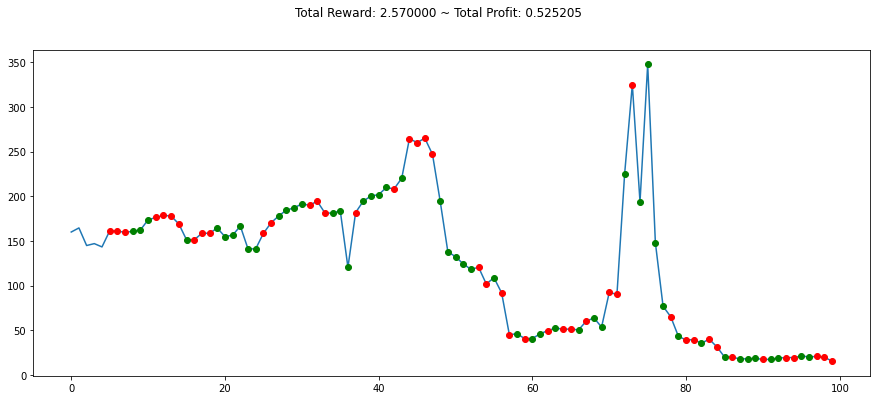

In [30]:
# Action :{ buy or sell}

state=env.reset()
while True:
    action =env.action_space.sample()
    n_state ,reward,done, info=env.step(action)
    if done:
        print('info',info)
        break
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

Build Enviorment and Train

In [31]:
env_maker=lambda: gym.make('stocks-v0',df=df,frame_bound=(5,100),window_size=5)

env=DummyVecEnv([env_maker])

In [32]:
model=A2C('MlpLstmPolicy',env,verbose=1)
model.learn(total_timesteps=100000)

---------------------------------
| explained_variance | -77.6    |
| fps                | 17       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 2.51e-05 |
---------------------------------
---------------------------------
| explained_variance | 0.0034   |
| fps                | 307      |
| nupdates           | 100      |
| policy_entropy     | 0.692    |
| total_timesteps    | 500      |
| value_loss         | 84.5     |
---------------------------------
---------------------------------
| explained_variance | -0.00206 |
| fps                | 342      |
| nupdates           | 200      |
| policy_entropy     | 0.693    |
| total_timesteps    | 1000     |
| value_loss         | 11.6     |
---------------------------------
---------------------------------
| explained_variance | 0.0203   |
| fps                | 353      |
| nupdates           | 300      |
| policy_entropy     | 0.693    |
| total_timest

Evaluation

info {'total_reward': 0.0, 'total_profit': 0.9336560869565218, 'position': 1}


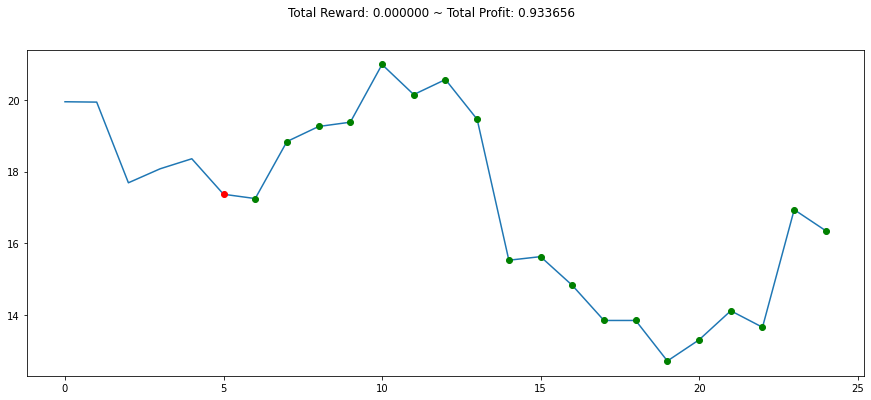

In [33]:
#Setting up the Agent Environment
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break


#Plotting our Model for Trained Trades
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()